In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy


data = pd.read_csv("./data/avg_data.csv")


In [2]:
original_cmap = sns.color_palette("Spectral_r", as_cmap=True)  # Reverse the colormap
colors = np.concatenate((original_cmap(np.linspace(0, 0.35, 4)), original_cmap(np.linspace(0.7, 1, 3))), axis=0) # Extract 10 colors
custom_palette = np.clip(colors, 0, 1)  # Ensure valid RGB range

# Convert darkened colors into a Seaborn-friendly palette
custom_palette = [tuple(c) for c in custom_palette]  # Convert array to list of 
one_color = custom_palette[1]

In [3]:
print("Mean time data")

for core in [1,2,4,8,16,32,64]:
    print(core, end="&")
    for agents in [50,100,200,400,800,1600,3200]:
        value = data.loc[(data['n_cores'] == core) & (data['n_agents'] == agents), 'time']
        value = value.values[0]
        value = np.round(value, 2)
        value = str(value).replace(".", ",")
        if agents != 3200:
            print(value, end="&")
        else:
            print(value, end="\\\\\n")
    

Mean time data
1&1,33&4,85&18,33&70,86&278,09&1099,97&4378,92\\
2&0,57&2,12&8,21&32,06&126,85&503,77&2010,06\\
4&0,32&1,13&4,33&16,9&66,75&264,6&1038,65\\
8&0,2&0,61&2,31&8,59&33,46&133,23&528,93\\
16&0,13&0,37&1,23&4,5&17,48&68,94&273,59\\
32&0,11&0,28&0,82&2,63&9,38&36,69&143,7\\
64&0,1&0,22&0,57&1,81&6,09&22,04&84,39\\


In [4]:
print("Speedup data:")

for core in [1,2,4,8,16,32,64]:
    print(core, end="&")
    for agents in [50,100,200,400,800,1600,3200]:
        value = data.loc[(data['n_cores'] == core) & (data['n_agents'] == agents), 'speedup']
        value = value.values[0]
        value = np.round(value, 2)
        value = str(value).replace(".", ",")
        if agents != 3200:
            print(value, end="&")
        else:
            print(value, end="\\\\\n")

Speedup data:
1&1,0&1,0&1,0&1,0&1,0&1,0&1,0\\
2&2,31&2,28&2,23&2,21&2,19&2,18&2,18\\
4&4,1&4,28&4,23&4,19&4,17&4,16&4,22\\
8&6,71&7,9&7,94&8,25&8,31&8,26&8,28\\
16&10,15&13,22&14,91&15,76&15,91&15,96&16,01\\
32&12,07&17,37&22,24&26,91&29,65&29,98&30,47\\
64&13,23&22,43&32,22&39,09&45,65&49,9&51,89\\


In [5]:
print("Efficency data:")


for core in [1,2,4,8,16,32,64]:
    print(core, end="&")
    for agents in [50,100,200,400,800,1600,3200]:
        value = data.loc[(data['n_cores'] == core) & (data['n_agents'] == agents), 'efficiency']
        value = value.values[0]
        value = np.round(value, 2)
        value = str(value).replace(".", ",")
        if agents != 3200:
            print(value, end="&")
        else:
            print(value, end="\\\\\n")
    

Efficency data:
1&1,0&1,0&1,0&1,0&1,0&1,0&1,0\\
2&1,16&1,14&1,12&1,11&1,1&1,09&1,09\\
4&1,02&1,07&1,06&1,05&1,04&1,04&1,05\\
8&0,84&0,99&0,99&1,03&1,04&1,03&1,03\\
16&0,63&0,83&0,93&0,98&0,99&1,0&1,0\\
32&0,38&0,54&0,69&0,84&0,93&0,94&0,95\\
64&0,21&0,35&0,5&0,61&0,71&0,78&0,81\\


In [6]:
print("Mean value data")
for val in [50, 100, 200, 400, 800, 1600, 3200]:
    value = data.groupby('n_agents').mean().loc[val, 'best_value']
    value = int(value)
    value = str(value).replace(".", ",")
    if val != 3200:
        print(value, end="&")
    else:
        print(value, end="\\\\\n")

Mean value data
150319&61362&30843&14946&6867&2892&901\\


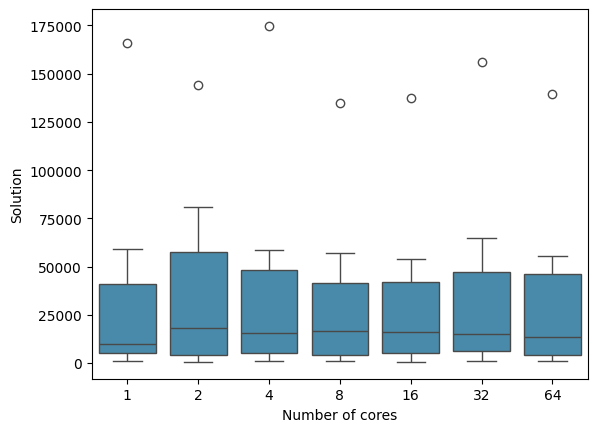

In [7]:
figure_0, ax_0 = plt.subplots()  

sns.boxplot(x='n_cores', y='best_value', data=data, ax=ax_0, color=one_color)

ax_0.set_ylabel('Solution')
ax_0.set_xlabel('Number of cores')

plt.show()
figure_0.savefig('./out/evaluation_solution_wrt_core.png')

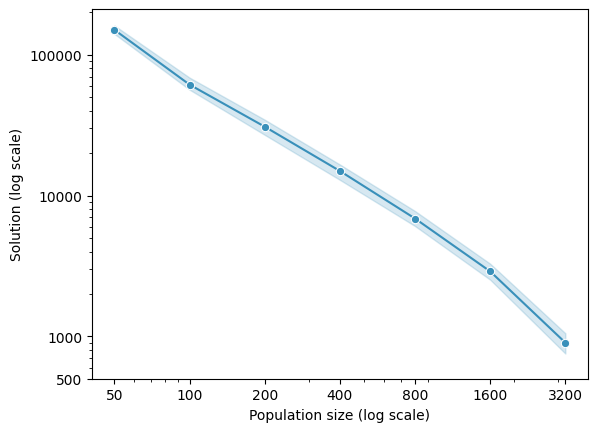

In [8]:
figure_1, ax_1 = plt.subplots()  

sns.lineplot(x='n_agents', y='best_value', data=data, marker="o", ax=ax_1, dashes=False, color=one_color)

ax_1.set_ylabel('Solution (log scale)')
ax_1.set_xlabel('Population size (log scale)')
ax_1.set_xscale('log')
ax_1.set_yscale('log')

ax_1.set_xticks([50, 100, 200, 400, 800, 1600, 3200])
ax_1.set_xticklabels([50, 100, 200, 400, 800, 1600, 3200])
ax_1.set_yticks([500, 1000, 10000, 100000])
ax_1.set_yticklabels([500, 1000, 10000, 100000])

plt.show()
figure_1.savefig('./out/evaluation_solution_wrt_popsize.png')

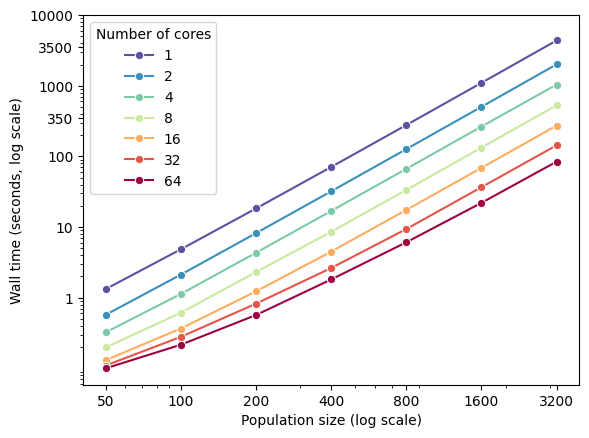

In [9]:
import numpy as np
figure_2, ax_2 = plt.subplots()  

ideal_data = pd.DataFrame({
    'n_cores': [1, 2, 4, 8, 16 ,32 ,64],
    'speedup': [1, 2, 4, 8, 16 ,32 ,64],
})

sns.lineplot(x='n_agents', y='time', data=data, marker="o", ax=ax_2, dashes=False, hue='n_cores', palette=custom_palette)

ax_2.set_yscale('log')
ax_2.set_xscale('log')
ax_2.set_yticks([1, 10, 100, 350, 1000, 3500, 10000])
ax_2.set_yticklabels([1, 10, 100, 350, 1000, 3500, 10000])
ax_2.set_xticks([50, 100, 200, 400, 800, 1600, 3200])
ax_2.set_xticklabels([50, 100, 200, 400, 800, 1600, 3200])

ax_2.set_xlabel('Population size (log scale)')
ax_2.set_ylabel('Wall time (seconds, log scale)')

ax_2.legend(title='Number of cores', loc='upper left')

plt.show()
figure_2.savefig('./out/times.png')

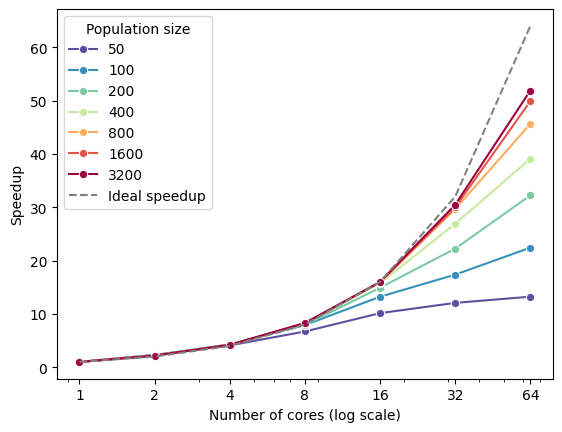

In [10]:
figure_3, ax_3 = plt.subplots()  

ideal_data = pd.DataFrame({
    'n_cores': [1, 2, 4, 8, 16 ,32 ,64],
    'speedup': [1, 2, 4, 8, 16 ,32 ,64],
})

sns.lineplot(x='n_cores', y='speedup', data=data, marker="o", ax=ax_3, dashes=False, hue='n_agents', palette=custom_palette)
sns.lineplot(x='n_cores', y='speedup', data=ideal_data, ax=ax_3, color='grey', linestyle='--', label='Ideal speedup')
ax_3.set_xscale('log')
ax_3.set_xticks([1, 2, 4, 8, 16, 32, 64])
ax_3.set_xticklabels([1, 2, 4, 8, 16, 32, 64])

ax_3.set_xlabel('Number of cores (log scale)')
ax_3.set_ylabel('Speedup')

ax_3.legend(title='Population size', loc='upper left')

plt.show()
figure_3.savefig('./out/speedup.png')

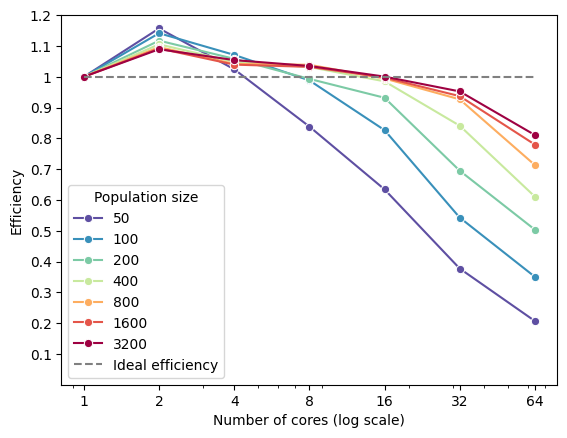

In [11]:
figure_4, ax_4 = plt.subplots()  

sns.lineplot(x='n_cores', y='efficiency', data=data, marker="o", ax=ax_4, dashes=False, hue='n_agents', palette=custom_palette)
ax_4.set_xscale('log')
ax_4.set_xticks([1, 2, 4, 8, 16, 32, 64])
ax_4.set_xticklabels([1, 2, 4, 8, 16, 32, 64])

ax_4.set_yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1 ,1.2])
ax_4.set_yticklabels([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2])
#add a linear line as y= 1
ax_4.plot([1, 64], [1, 1], color='grey', linestyle='--', label='Ideal efficiency')
ax_4.set_ylim(0, 1.2)

ax_4.set_xlabel('Number of cores (log scale)')
ax_4.set_ylabel('Efficiency')
ax_4.legend(title='Population size', loc='lower left')


plt.show()

figure_4.savefig('./out/efficiency.png')

/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_66638/1933127255.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scalability_data = pd.concat([scalability_data, new_data], axis=0)


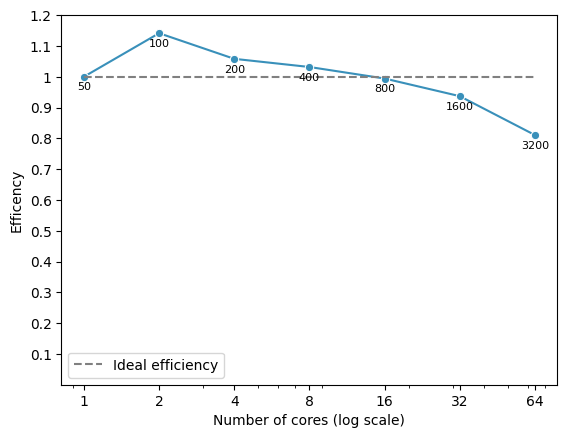

In [12]:
figure_5, ax_5 = plt.subplots()  

scalability_data = pd.DataFrame(columns=['n_agents', 'n_cores', 'time', 'speedup', 'efficiency'])

for i in range(1, 8):
    new_data = copy.deepcopy(data[(data['n_cores'] == 2**(i-1)) & (data['n_agents'] == 2**(i-1)*50)].copy())
    scalability_data = pd.concat([scalability_data, new_data], axis=0)
    

sns.lineplot(x='n_cores', y='efficiency', data=scalability_data, marker="o", ax=ax_5, dashes=False, color=one_color)
ax_5.set_xscale('log')
ax_5.set_xticks([1, 2, 4, 8, 16, 32, 64])
ax_5.set_xticklabels([1, 2, 4, 8, 16, 32, 64])

#Add lable to each point
for i in range(len(scalability_data)):
    ax_5.text(scalability_data['n_cores'].iloc[i], scalability_data['efficiency'].iloc[i]-0.05, scalability_data['n_agents'].iloc[i], fontsize=8, ha='center', va='bottom')

ax_5.set_yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2])
ax_5.set_yticklabels([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2])
ax_5.plot([1, 64], [1, 1], color='gray', linestyle='--', label='Ideal efficiency')
ax_5.set_ylim(0, 1.2)

ax_5.set_xlabel('Number of cores (log scale)')
ax_5.set_ylabel('Efficency')
ax_5.legend(loc='lower left')

plt.show()
figure_5.savefig('./out/scalability.png')